# Netflix Data Analysis – Exploratory Data Analysis (EDA)

## Project Overview
This project performs Exploratory Data Analysis (EDA) on the Netflix dataset.
The goal is to understand the structure of the data, clean it, handle missing values,
and extract meaningful insights such as content distribution, country-wise trends,
and rating patterns.

## Dataset
- Source: Netflix Titles Dataset
- Rows: 8,809
- Columns: 12

In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("netflix_titles.csv", encoding="latin1")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


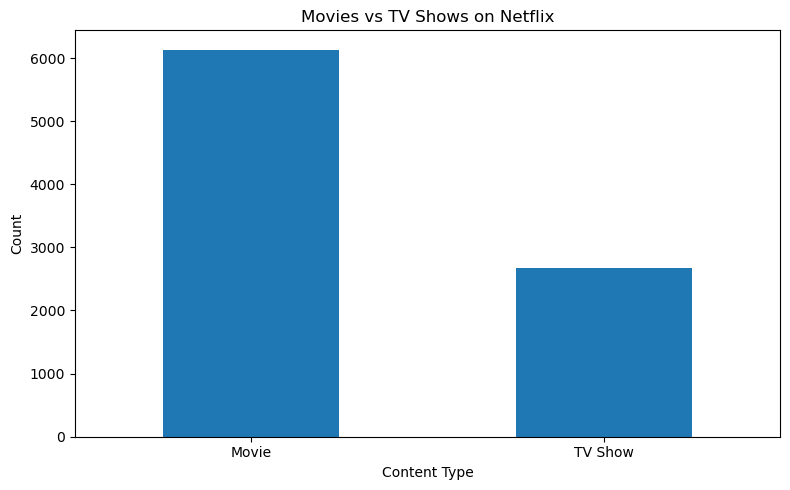

In [29]:
plt.figure(figsize=(8,5))
df['type'].value_counts().plot(kind='bar')

plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Movies dominate Netflix content compared to TV Shows

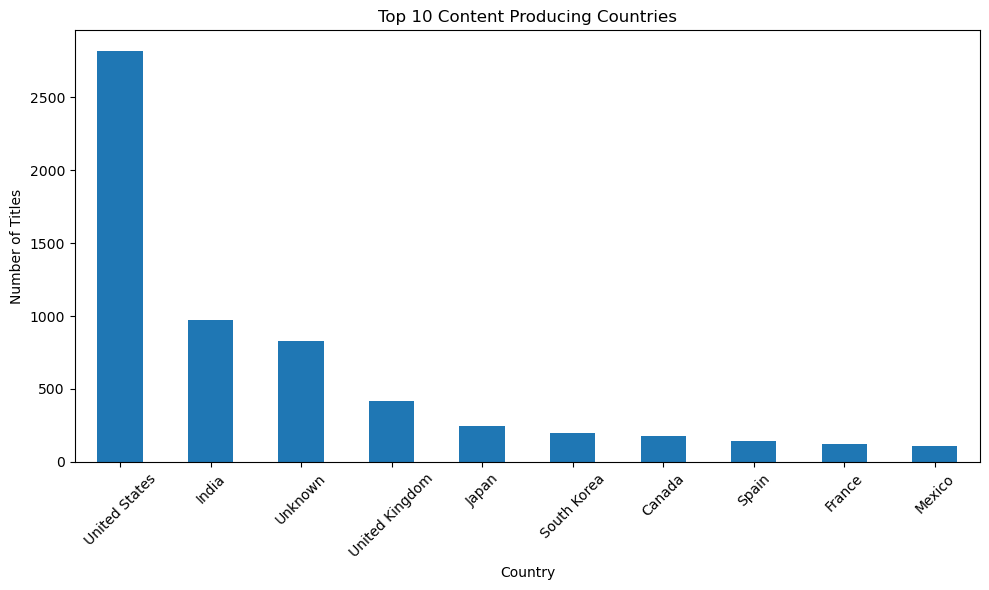

In [30]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='bar')

plt.title("Top 10 Content Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The United States produces the highest number of titles, followed by India and the UK.

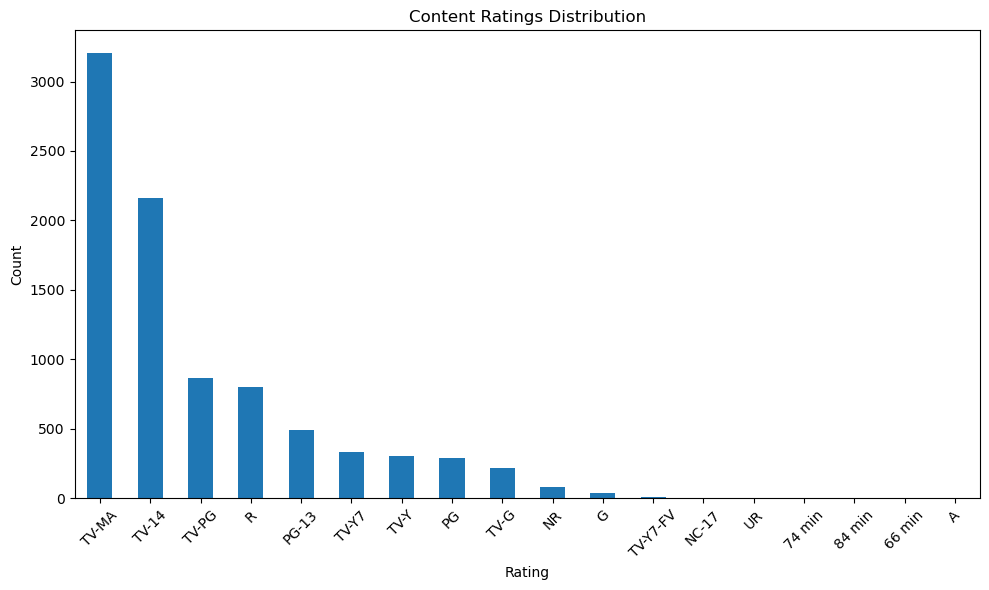

In [31]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().plot(kind='bar')

plt.title("Content Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Most content on Netflix is rated TV-MA and TV-14, indicating focus on mature audiences.

## Understanding the Dataset Structure
We first inspect the shape, columns, and basic information of the dataset.

In [13]:
df.shape

(8809, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


## Removing Unnecessary Columns
Some columns were automatically created during CSV export and do not carry
any useful information. These columns are removed to keep the dataset clean.

In [15]:
df = df.loc[:, ~df.columns.str.contains("Unnamed")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


## Missing Values Analysis
Checking for missing values to understand data quality issues.

In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Handling Missing Values
Instead of dropping rows (which may cause data loss),
missing values are filled with meaningful placeholders.

In [17]:
df = df.copy()  
df.loc[:, "country"] = df["country"].fillna("Unknown")
df.loc[:, "cast"] = df["cast"].fillna("Not Available")
df.loc[:, "director"] = df["director"].fillna("Not Available")
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

## Content Type Distribution
Analyzing the distribution of Movies and TV Shows on Netflix.

In [18]:
df["type"].value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

## Country-wise Content Distribution
Identifying the top countries producing Netflix content.

In [19]:
df["country"].value_counts().head(10)

country
United States     2819
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

## Rating Distribution
Analyzing the target audience for Netflix content using rating data.

In [20]:
df["rating"].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
A              1
Name: count, dtype: int64

## Key Insights

- Netflix has significantly more Movies than TV Shows.
- The United States is the largest content producer, followed by India.
- Most content is targeted toward mature audiences (TV-MA, TV-14).
- Some data quality issues were identified, such as incorrect values in the rating column.

## Conclusion
- Movies dominate Netflix content over TV Shows.
- The United States is the top content producer, followed by India.
- Most content is targeted toward mature audiences (TV-MA, TV-14).
- Data cleaning was essential to handle missing values and incorrect entries.

This EDA forms a strong foundation for further analysis or machine learning tasks.

## Data Quality Observation
Some incorrect values such as duration (e.g., "74 min") were found in the rating column.
This indicates data quality issues that should be cleaned before advanced analysis or modeling.